In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pybedtools
import re
import streamlit as st
from pybedtools import BedTool
import shutil
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
alu_df = pybedtools.BedTool('a - Repeats')

In [4]:
alu_df.head(20)

chr1	16777160	16777470	AluSp	2147	+
 chr1	25165800	25166089	AluY	2626	-
 chr1	33553606	33554646	L2b	626	+
 chr1	50330063	50332153	L1PA10	12545	+
 chr1	58720067	58720973	L1PA2	8050	-
 chr1	75496180	75498100	L1MB7	10586	+
 chr1	83886030	83886750	ERVL-E-int	980	-
 chr1	100662895	100663391	L2a	1422	-
 chr1	117440426	117440514	L1ME1	532	+
 chr1	117440494	117441457	L1ME1	4025	+
 chr1	142605234	142610426	L1PA7	21397	+
 chr1	150994892	150995191	AluY	2436	-
 chr1	159381596	159383639	L1PA3	10586	+
 chr1	167772064	167772362	AluSq2	2261	+
 chr1	184548978	184550051	HSMAR2	7221	-
 chr1	192937729	192938046	MLT1J	491	+
 chr1	209714984	209715230	MIRb	346	-
 chr1	243269324	243269678	THE1B	2249	+
 chr1	1048297	     1048591	AluSx1	2213	+
 chr1	2096977	     2097155	MER58A	635	-
 

In [5]:
alu_df

<BedTool(a - Repeats)>

In [6]:
df_a = pd.read_table(alu_df.fn, names=['chrom', 'start', 'stop', 'name', 'score', 'strand'])

In [7]:
df_a

,chrom,start,stop,name,score,strand
0,chr1,16777160,16777470,AluSp,2147,+
1,chr1,25165800,25166089,AluY,2626,-
2,chr1,33553606,33554646,L2b,626,+
3,chr1,50330063,50332153,L1PA10,12545,+
4,chr1,58720067,58720973,L1PA2,8050,-
...,...,...,...,...,...,...
5481336,chr21_gl000210_random,25378,25875,MER74B,1674,+
5481337,chr21_gl000210_random,26437,26596,MIRc,308,-
5481338,chr21_gl000210_random,26881,27022,MIRc,475,-
5481339,chr21_gl000210_random,27296,27447,HAL1-2a_MD,371,+


In [8]:
tf_df = pybedtools.BedTool('b - TF')

In [9]:
tf_df.head(20)

chr1	184548974	184549885	SETDB1	436
 chr1	226492354	226492784	CTCF	149
 chr1	243269283	243269767	SETDB1	135
 chr1	243269304	243269644	CHD2	239
 chr1	243269306	243269746	CBX3	376
 chr1	1048502	1049386	KAP1	380
 chr1	2097139	2097389	TEAD4	209
 chr1	9436759	9437223	POLR2A	169
 chr1	9437031	9437357	NR3C1	542
 chr1	9437111	9437327	CTCF	128
 chr1	19922758	19923238	CHD1	277
 chr1	19922759	19923079	JUND	177
 chr1	19922817	19923257	TEAD4	302
 chr1	19922822	19923132	BHLHE40	234
 chr1	19922834	19923273	TAF1	177
 chr1	19922851	19924512	POLR2A	1000
 chr1	19922856	19923516	MTA3	376
 chr1	19922889	19923848	E2F1	535
 chr1	19922889	19923719	EP300	219
 chr1	19922925	19923225	RXRA	157
 

In [9]:
tf_df

<BedTool(b - TF)>

In [10]:
df_b = pd.read_table(tf_df.fn, names=['chrom', 'start', 'stop', 'name', 'score'])

In [11]:
df_b 

,chrom,start,stop,name,score
0,chr1,184548974,184549885,SETDB1,436
1,chr1,226492354,226492784,CTCF,149
2,chr1,243269283,243269767,SETDB1,135
3,chr1,243269304,243269644,CHD2,239
4,chr1,243269306,243269746,CBX3,376
...,...,...,...,...,...
4638415,chr22_kb663609_alt,54796,55092,CTCF,169
4638416,chr22_kb663609_alt,54892,55064,MAX,356
4638417,chr22_kb663609_alt,56439,56735,BHLHE40,174
4638418,chr22_kb663609_alt,56485,56665,MAX,388


In [12]:
df_a

,chrom,start,stop,name,score,strand
0,chr1,16777160,16777470,AluSp,2147,+
1,chr1,25165800,25166089,AluY,2626,-
2,chr1,33553606,33554646,L2b,626,+
3,chr1,50330063,50332153,L1PA10,12545,+
4,chr1,58720067,58720973,L1PA2,8050,-
...,...,...,...,...,...,...
5481336,chr21_gl000210_random,25378,25875,MER74B,1674,+
5481337,chr21_gl000210_random,26437,26596,MIRc,308,-
5481338,chr21_gl000210_random,26881,27022,MIRc,475,-
5481339,chr21_gl000210_random,27296,27447,HAL1-2a_MD,371,+


In [13]:
#Drop all the rows whose name does not start with Alu
df_a = df_a[df_a['name'].str.startswith('Alu')]
df_a.reset_index(drop=True, inplace=True)

In [14]:
df_a

,chrom,start,stop,name,score,strand
0,chr1,16777160,16777470,AluSp,2147,+
1,chr1,25165800,25166089,AluY,2626,-
2,chr1,150994892,150995191,AluY,2436,-
3,chr1,167772064,167772362,AluSq2,2261,+
4,chr1,1048297,1048591,AluSx1,2213,+
...,...,...,...,...,...,...
1189766,chr21_gl000210_random,17838,18069,AluSx,1732,-
1189767,chr21_gl000210_random,23153,23461,AluSx,1773,+
1189768,chr21_gl000210_random,23937,24233,AluSx1,2307,+
1189769,chr21_gl000210_random,24895,25204,AluSx1,2271,-


In [16]:
user_input_tf = input('Enter the name of the TF: ')
print(user_input_tf, type(user_input_tf))

MEF2C <class 'str'>


In [17]:
df_b_new = df_b[df_b['name'].str.contains(user_input_tf)]
df_b_new.reset_index(drop=True, inplace=True)

In [18]:
df_b_new

,chrom,start,stop,name,score
0,chr1,1310510,1310806,MEF2C,245
1,chr1,55181295,55181591,MEF2C,124
2,chr1,117047125,117047421,MEF2C,130
3,chr1,192544700,192544996,MEF2C,140
4,chr1,801149,801445,MEF2C,145
...,...,...,...,...,...
9677,chr20_gl383577_alt,55105,55401,MEF2C,273
9678,chr21_gl383578_alt,41934,42090,MEF2C,518
9679,chr21_gl383580_alt,2796,3092,MEF2C,156
9680,chr21_gl383581_alt,29323,29619,MEF2C,171


In [19]:
df_a_bed = pybedtools.BedTool.from_dataframe(df_a)
df_b_bed = pybedtools.BedTool.from_dataframe(df_b_new)

In [20]:
df_a_bed

<BedTool(/tmp/pybedtools.sxablnl_.tmp)>

In [21]:
df_b_bed

<BedTool(/tmp/pybedtools.tyuz2kcm.tmp)>

In [22]:
df_a_bed.head()

chr1	16777160	16777470	AluSp	2147	+
 chr1	25165800	25166089	AluY	2626	-
 chr1	150994892	150995191	AluY	2436	-
 chr1	167772064	167772362	AluSq2	2261	+
 chr1	1048297	1048591	AluSx1	2213	+
 chr1	12582710	12583018	AluSx1	2394	+
 chr1	17825788	17826094	AluSx1	2400	-
 chr1	26214171	26214475	AluSc	2447	-
 chr1	27262667	27262980	AluSp	2306	-
 chr1	32505732	32506023	AluSq2	2263	+
 

In [23]:
df_b_bed.head()

chr1	1310510	1310806	MEF2C	245
 chr1	55181295	55181591	MEF2C	124
 chr1	117047125	117047421	MEF2C	130
 chr1	192544700	192544996	MEF2C	140
 chr1	801149	801445	MEF2C	145
 chr1	948610	948906	MEF2C	137
 chr1	966733	966872	MEF2C	408
 chr1	999591	999887	MEF2C	217
 chr1	1538065	1538361	MEF2C	300
 chr1	1710267	1710563	MEF2C	237
 

In [24]:
c = df_a_bed.intersect(df_b_bed, wa=True)

In [25]:
c

<BedTool(/tmp/pybedtools.15m4xvg_.tmp)>

In [27]:
df_b_bed_2 = pybedtools.BedTool.from_dataframe(df_b)

In [56]:
new = df_a_bed.intersect(df_b_bed_2, wo=True)

In [57]:
new.head(1)

chr1	150994892	150995191	AluY	2436	-	chr1	150995121	150995717	ZNF263	244	70
 

In [58]:
new_df = pd.read_table(new.fn, names=['chrom', 'start', 'stop', 'name', 'score','strand', 'chrom2', 'start2', 'stop2', 'TF', 'score2'], index_col=False)

In [59]:
new_df

,chrom,start,stop,name,score,strand,chrom2,start2,stop2,TF,score2
0,chr1,150994892,150995191,AluY,2436,-,chr1,150995121,150995717,ZNF263,244
1,chr1,167772064,167772362,AluSq2,2261,+,chr1,167772267,167772986,SETDB1,251
2,chr1,167772064,167772362,AluSq2,2261,+,chr1,167772338,167773215,KAP1,902
3,chr1,167772064,167772362,AluSq2,2261,+,chr1,167772343,167772873,TFAP2A,122
4,chr1,1048297,1048591,AluSx1,2213,+,chr1,1048502,1049386,KAP1,380
...,...,...,...,...,...,...,...,...,...,...,...
473487,chr22_kb663609_alt,54207,54354,AluJb,1639,-,chr22_kb663609_alt,54312,54586,CEBPB,191
473488,chr22_kb663609_alt,54354,54670,AluSp,1837,-,chr22_kb663609_alt,54312,54586,CEBPB,191
473489,chr22_kb663609_alt,54670,54807,AluJb,1639,-,chr22_kb663609_alt,54796,55092,CTCF,169
473490,chr22_kb663609_alt,56259,56545,AluJb,1690,-,chr22_kb663609_alt,56439,56735,BHLHE40,174


In [60]:
ans = new_df.loc[:, ['chrom', 'start', 'stop', 'name', 'TF', 'score', 'strand']]

In [61]:
ans

,chrom,start,stop,name,TF,score,strand
0,chr1,150994892,150995191,AluY,ZNF263,2436,-
1,chr1,167772064,167772362,AluSq2,SETDB1,2261,+
2,chr1,167772064,167772362,AluSq2,KAP1,2261,+
3,chr1,167772064,167772362,AluSq2,TFAP2A,2261,+
4,chr1,1048297,1048591,AluSx1,KAP1,2213,+
...,...,...,...,...,...,...,...
473487,chr22_kb663609_alt,54207,54354,AluJb,CEBPB,1639,-
473488,chr22_kb663609_alt,54354,54670,AluSp,CEBPB,1837,-
473489,chr22_kb663609_alt,54670,54807,AluJb,CTCF,1639,-
473490,chr22_kb663609_alt,56259,56545,AluJb,BHLHE40,1690,-


In [62]:
value, counts = np.unique(ans['TF'], return_counts=True)

In [63]:
print(value, counts)

['ARID3A' 'ATF1' 'ATF2' 'ATF3' 'BACH1' 'BATF' 'BCL11A' 'BCL3' 'BCLAF1'
 'BDP1' 'BHLHE40' 'BRCA1' 'BRF1' 'BRF2' 'CBX3' 'CCNT2' 'CEBPB' 'CEBPD'
 'CHD1' 'CHD2' 'CREB1' 'CTBP2' 'CTCF' 'CTCFL' 'E2F1' 'E2F4' 'E2F6' 'EBF1'
 'EGR1' 'ELF1' 'ELK1' 'ELK4' 'EP300' 'ESR1' 'ESRRA' 'ETS1' 'EZH2' 'FAM48A'
 'FOS' 'FOSL1' 'FOSL2' 'FOXA1' 'FOXA2' 'FOXM1' 'FOXP2' 'GABPA' 'GATA1'
 'GATA2' 'GATA3' 'GRp20' 'GTF2B' 'GTF2F1' 'GTF3C2' 'HDAC1' 'HDAC2' 'HDAC6'
 'HDAC8' 'HMGN3' 'HNF4A' 'HNF4G' 'HSF1' 'IKZF1' 'IRF1' 'IRF3' 'IRF4' 'JUN'
 'JUNB' 'JUND' 'KAP1' 'KDM5A' 'KDM5B' 'MAFF' 'MAFK' 'MAX' 'MAZ' 'MBD4'
 'MEF2A' 'MEF2C' 'MTA3' 'MXI1' 'MYBL2' 'MYC' 'NANOG' 'NFATC1' 'NFE2'
 'NFIC' 'NFYA' 'NFYB' 'NR2C2' 'NR2F2' 'NR3C1' 'NRF1' 'PAX5' 'PBX3' 'PHF8'
 'PML' 'POLR2A' 'POLR3G' 'POU2F2' 'POU5F1' 'PPARGC1A' 'PRDM1' 'RAD21'
 'RBBP5' 'RCOR1' 'RDBP' 'RELA' 'REST' 'RFX5' 'RPC155' 'RUNX3' 'RXRA'
 'SAP30' 'SETDB1' 'SIN3A' 'SIN3AK20' 'SIRT6' 'SIX5' 'SMARCA4' 'SMARCB1'
 'SMARCC1' 'SMARCC2' 'SMC3' 'SP1' 'SP2' 'SP4' 'SPI1' 'SREBP1' '

In [70]:
frequencies = pd.DataFrame({'TF': value, 'counts': counts})

In [71]:
frequencies

,TF,counts
0,ARID3A,3344
1,ATF1,857
2,ATF2,4130
3,ATF3,2557
4,BACH1,794
...,...,...
156,ZNF143,3437
157,ZNF217,1523
158,ZNF263,4195
159,ZNF274,587


In [76]:
frequencies.sort_values(by='counts', ascending=False, inplace=True)
frequencies.to_csv('frequencies.csv', index=False)

In [26]:
final_c_df = pd.read_table(c.fn, names=['chrom', 'start', 'stop', 'name', 'score', 'strand'])

In [27]:
final_c_df

,chrom,start,stop,name,score,strand
0,chr1,8554504,8554796,AluY,2204,+
1,chr1,9848030,9848333,AluJb,1963,+
2,chr1,16243339,16243633,AluJb,1942,+
3,chr1,16290323,16290632,AluJo,1600,+
4,chr1,21005523,21005645,AluJb,887,+
...,...,...,...,...,...,...
705,chr10_gl383546_alt,303443,303756,AluSq2,2521,-
706,chr17_jh591186_fix,334480,334772,AluSq,2253,-
707,chr18_gl383567_alt,20832,21134,AluJr,1793,-
708,chr19_gl383573_alt,371953,372258,AluSx4,2447,-


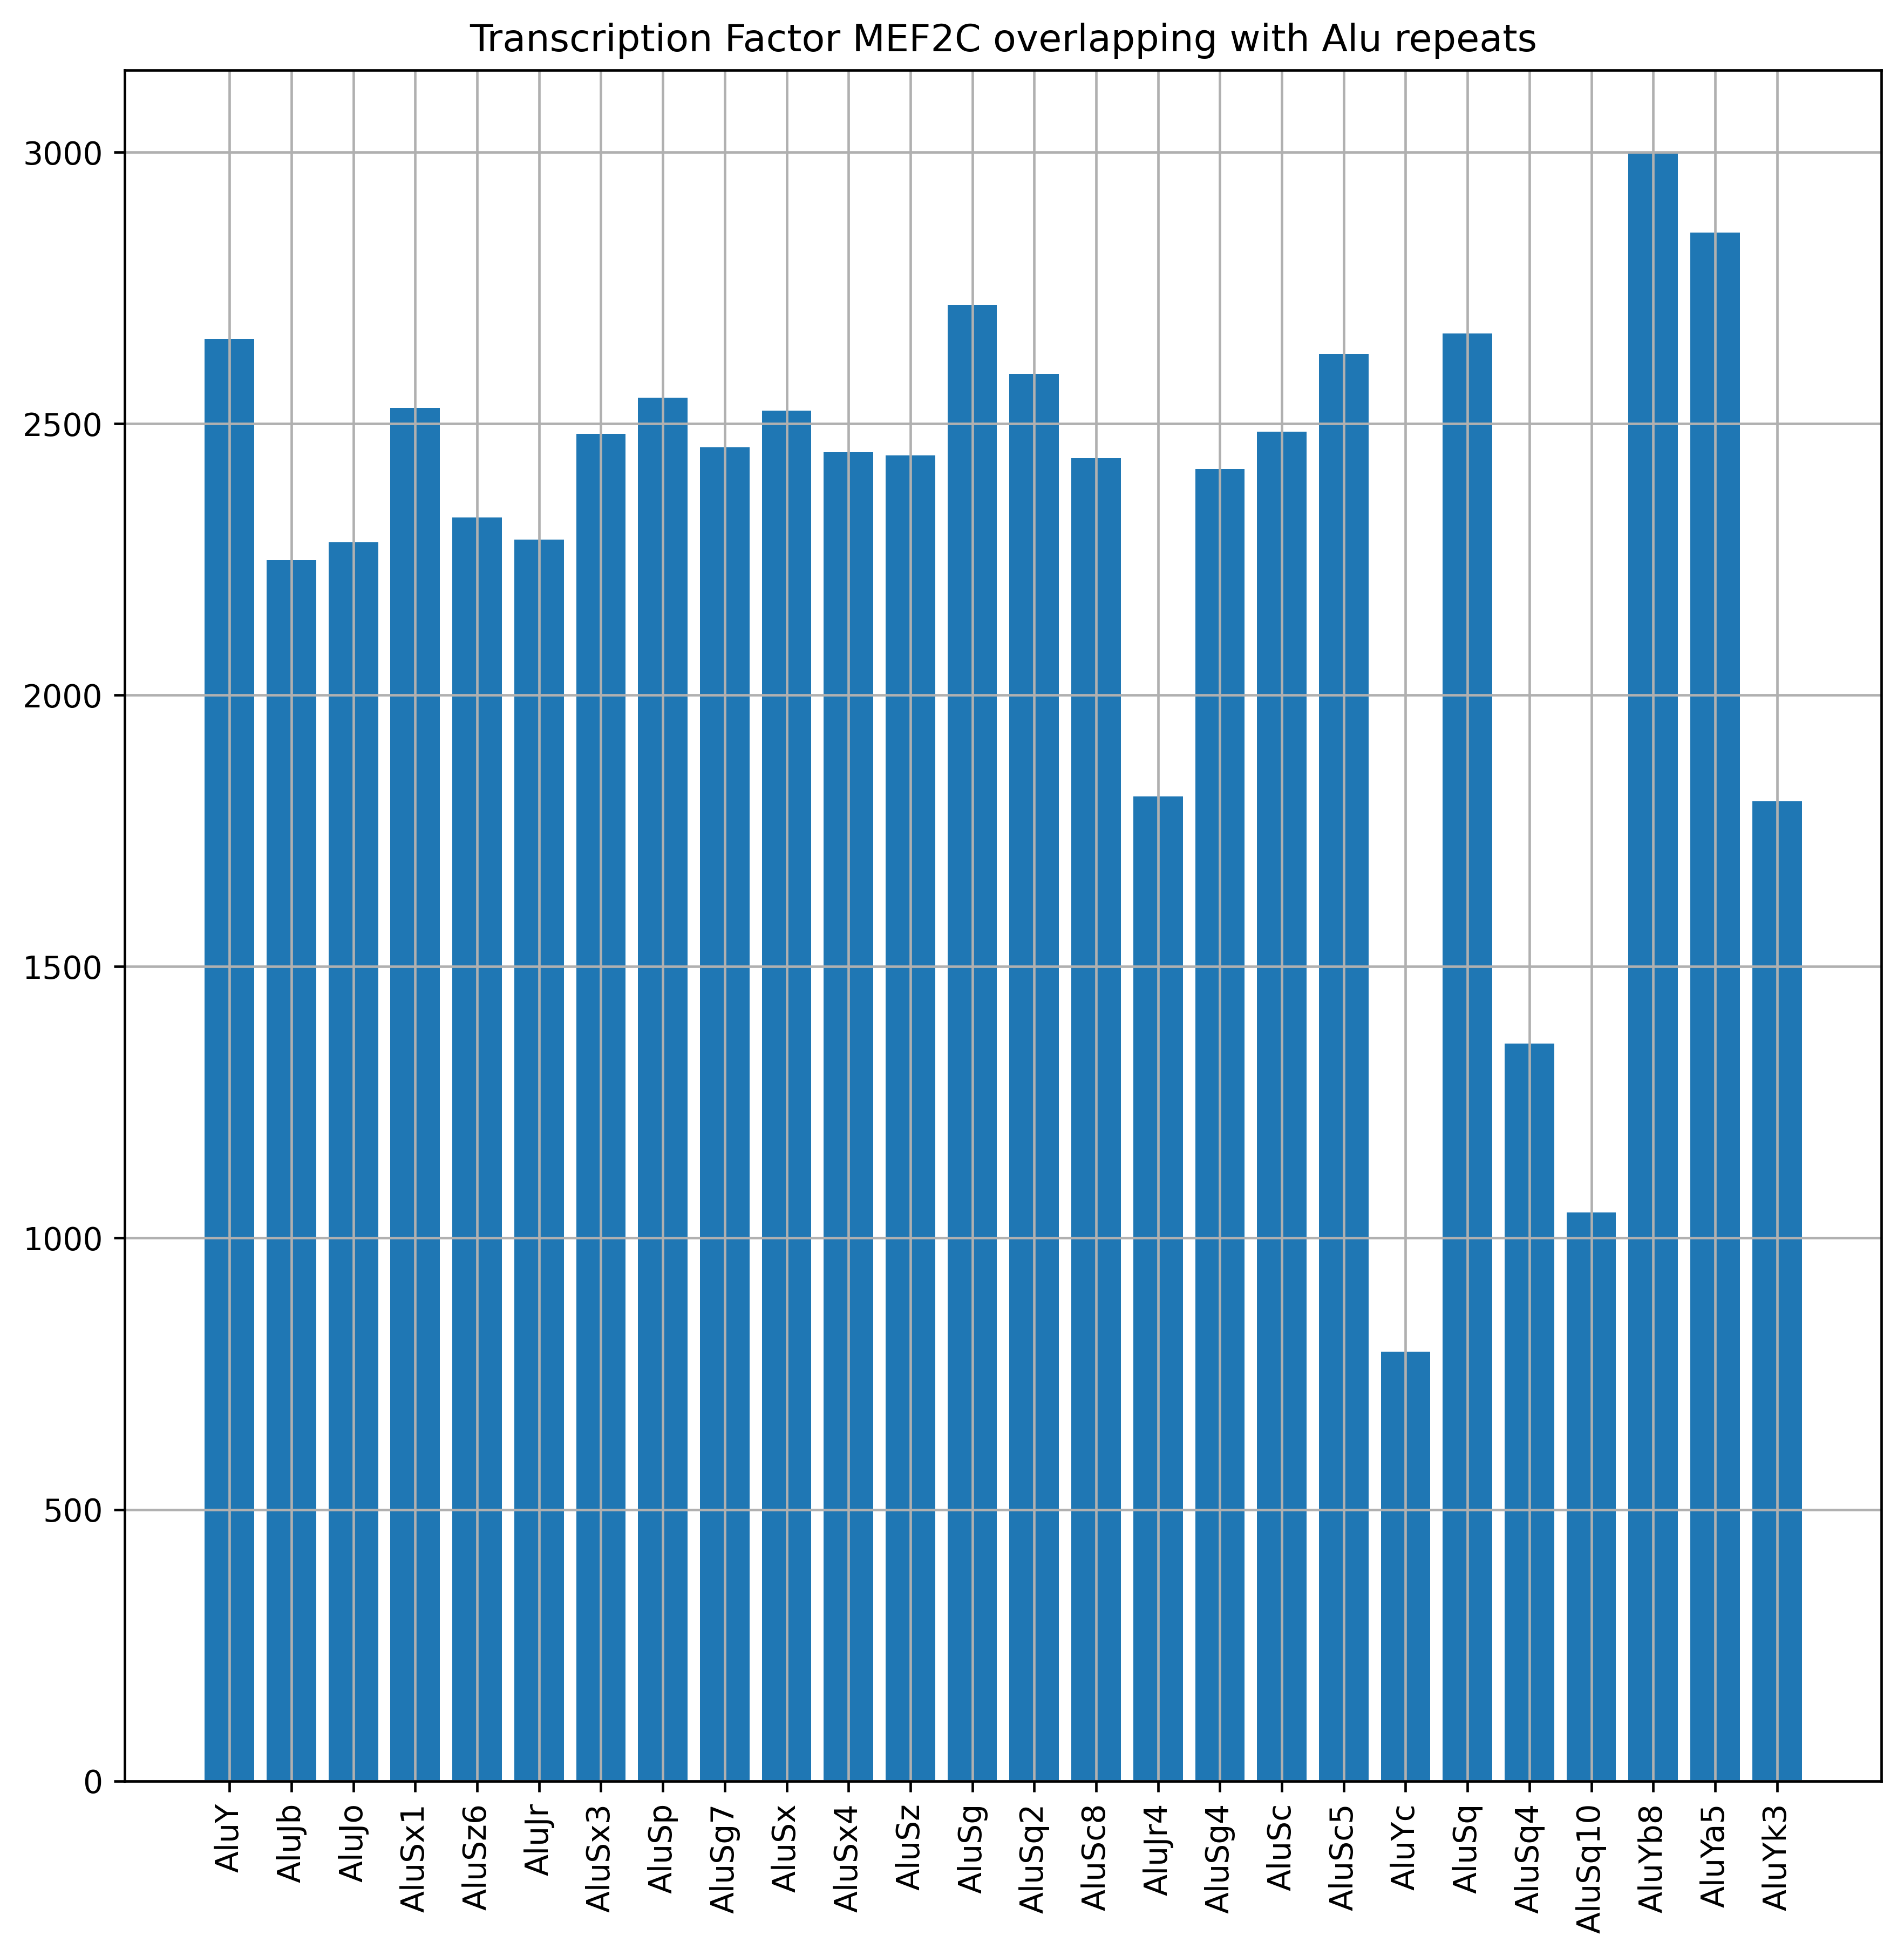

In [28]:
plt.figure(figsize=(10,10), dpi=420)
plt.bar(final_c_df['name'], final_c_df['score'])
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Transcription Factor ' + str(user_input_tf) + ' overlapping with Alu repeats')
plt.show()

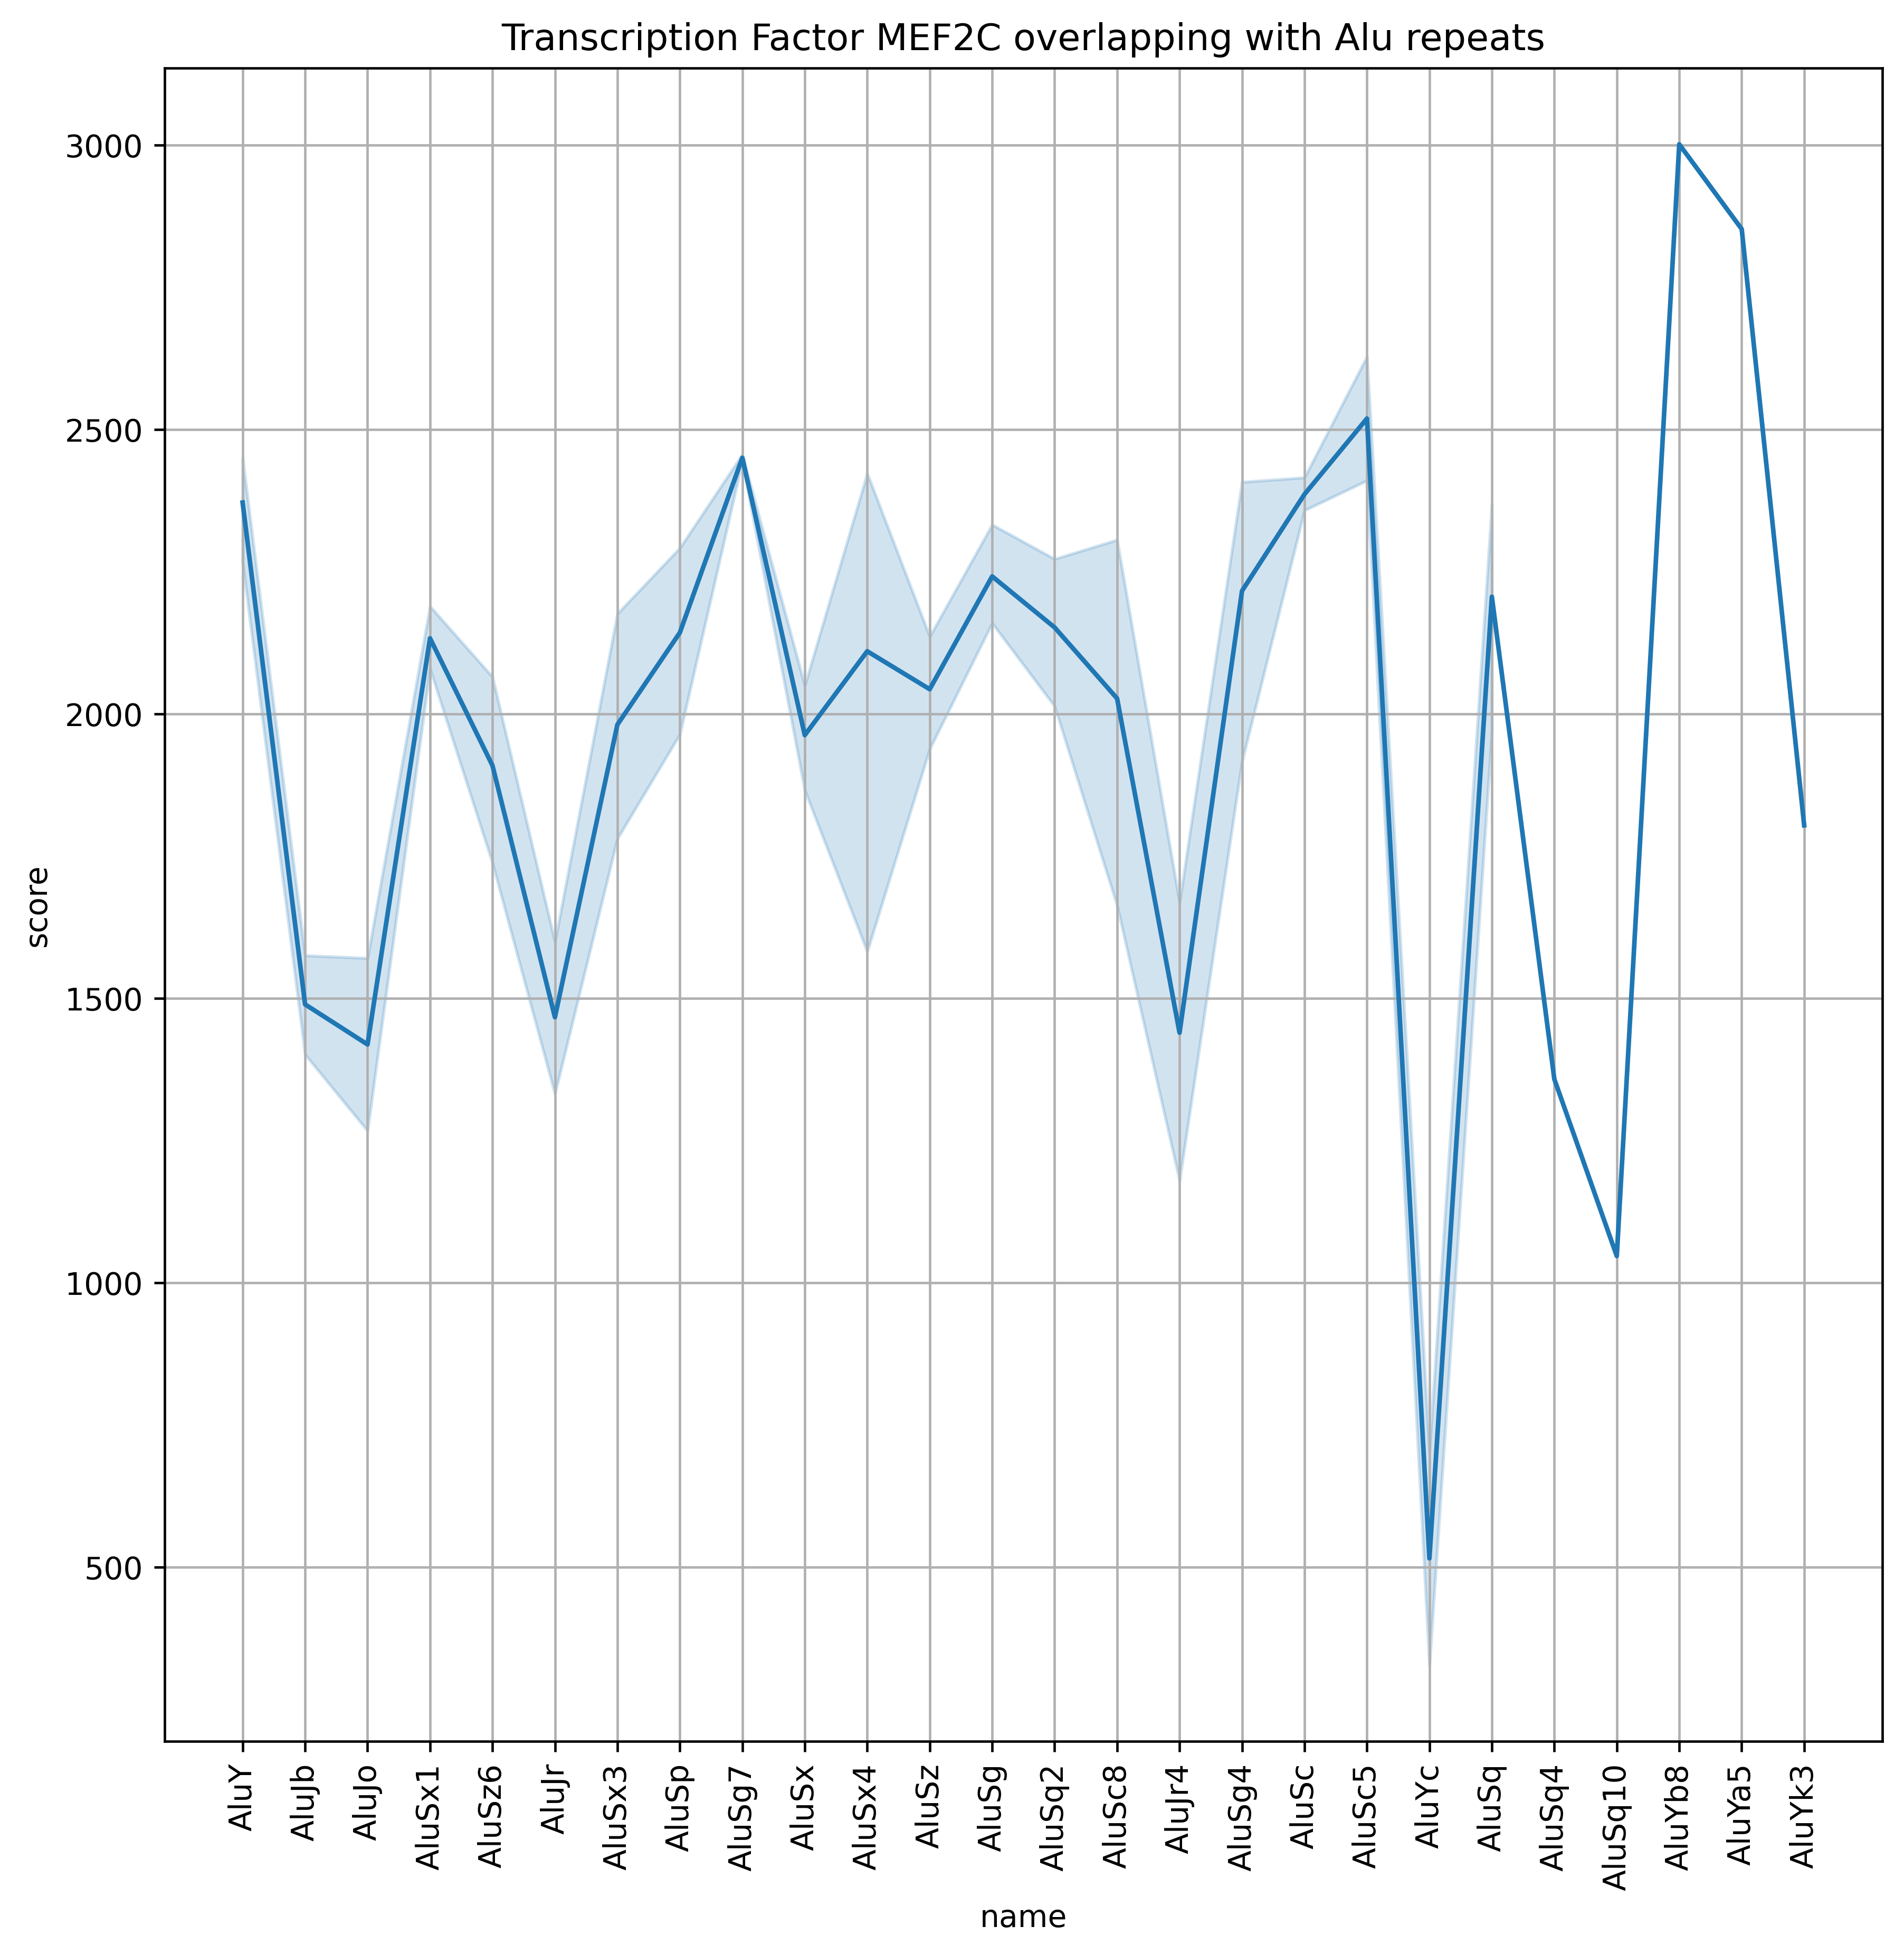

In [29]:
plt.figure(figsize=(10,10), dpi=420)
sns.lineplot(final_c_df['name'], final_c_df['score'])
plt.grid(True)
plt.title('Transcription Factor ' + str(user_input_tf) + ' overlapping with Alu repeats')
plt.xticks(rotation=90)
plt.show()

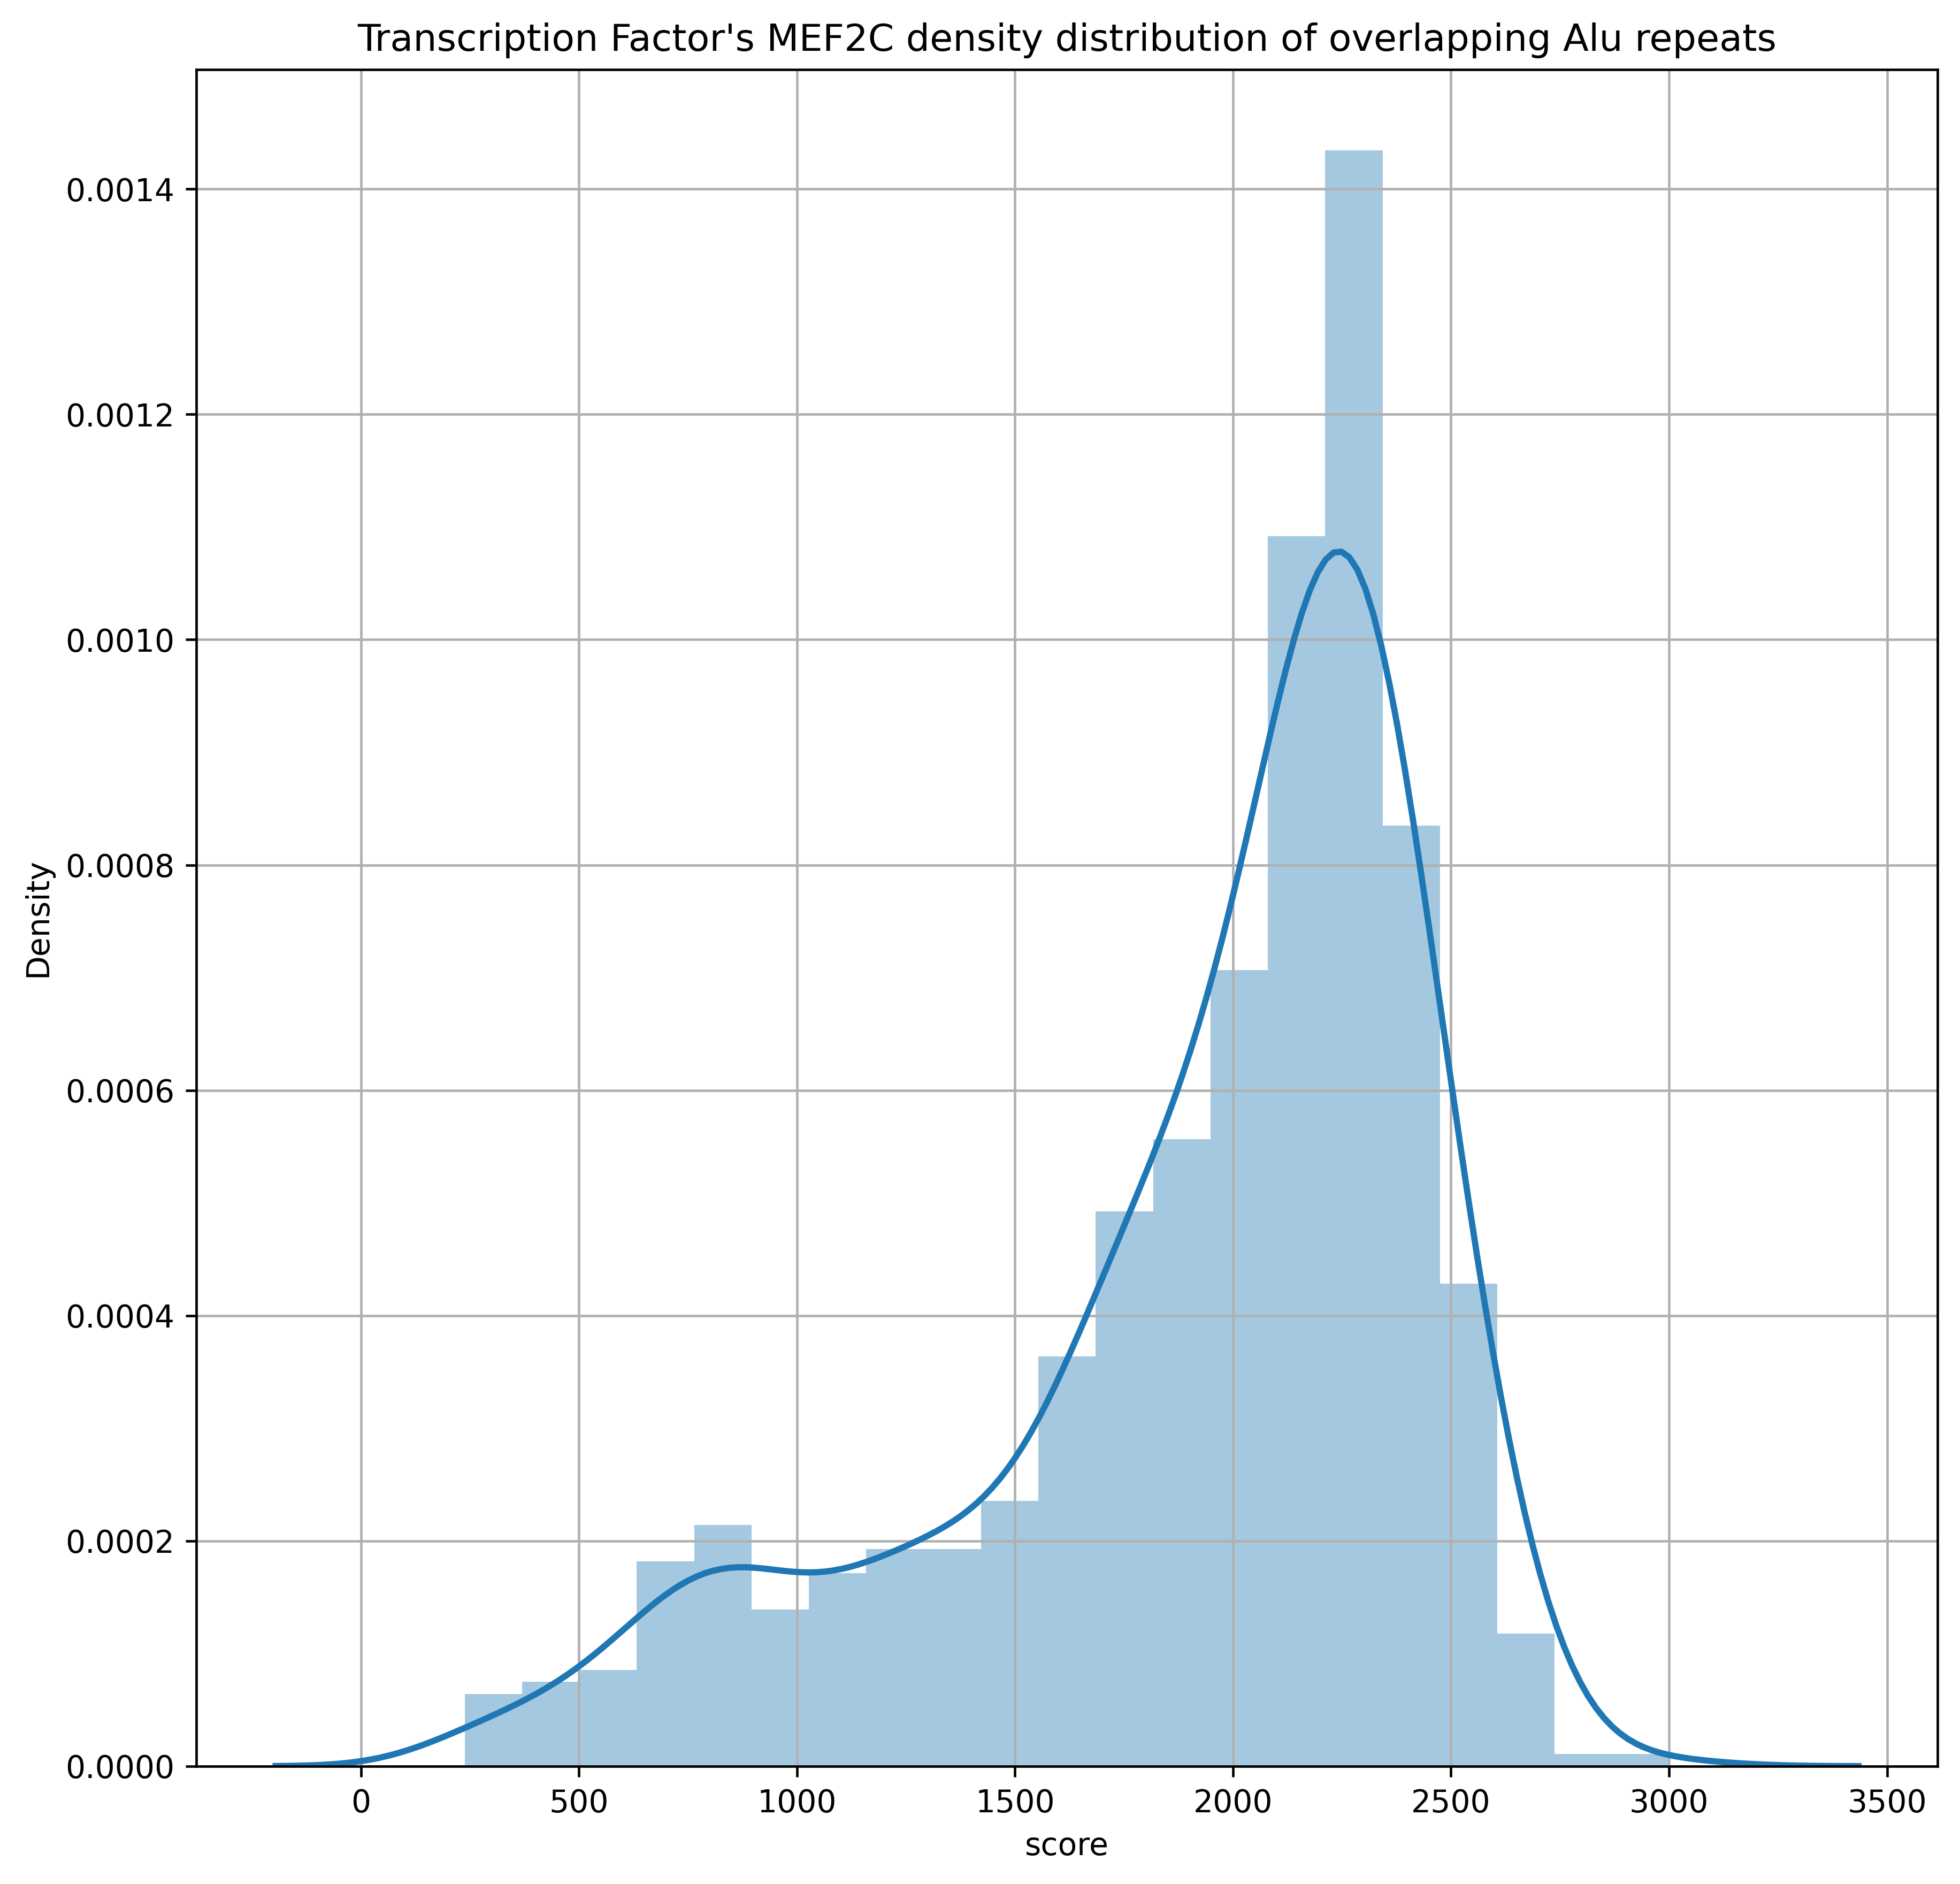

In [30]:
#Plotting density differentiation
plt.figure(figsize=(10,10), dpi=420)
sns.distplot(final_c_df['score'], hist=True, kde=True, kde_kws={'linewidth': 2})
plt.grid(True)
plt.title("Transcription Factor's " + str(user_input_tf) + ' density distribution of overlapping Alu repeats')
plt.show()

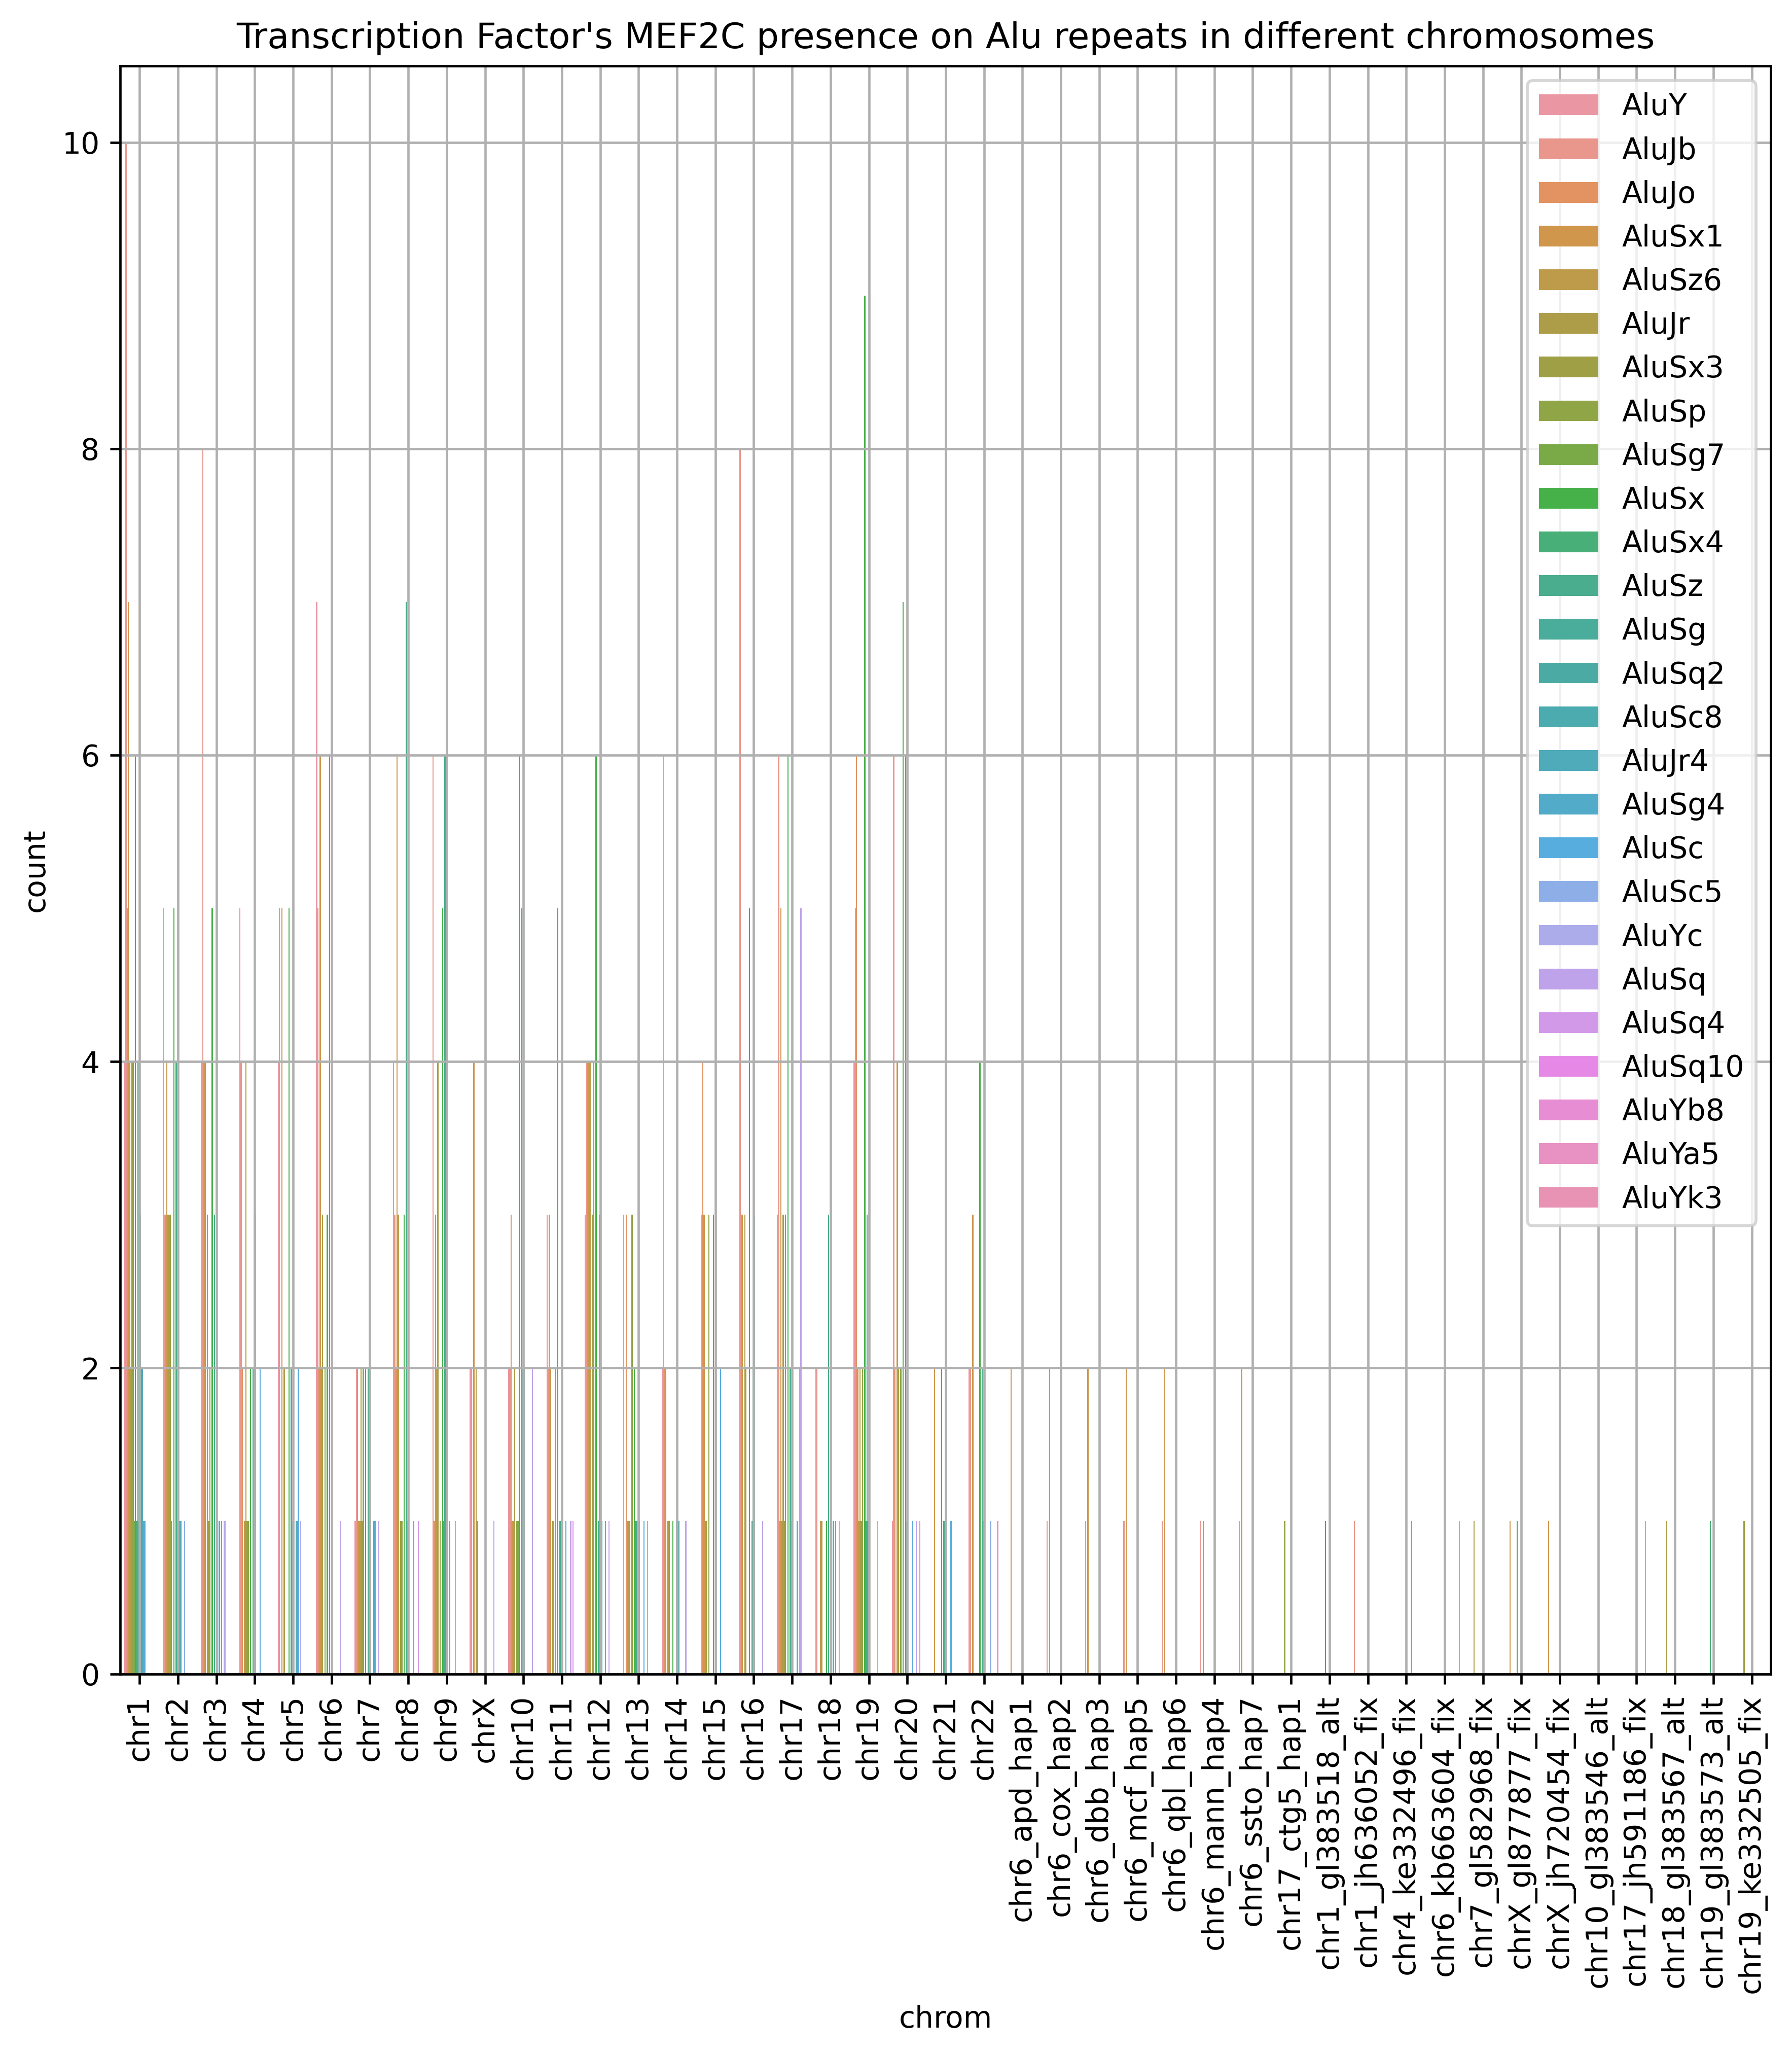

In [31]:
# Plotting where which TF is present on which chromosome (Alu)

plt.figure(figsize=(10,10), dpi=420)
sns.countplot(final_c_df['chrom'], hue=final_c_df['name'])
plt.title("Transcription Factor's " + str(user_input_tf) + ' presence on Alu repeats in different chromosomes')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [32]:
val_counts = final_c_df['chrom'].value_counts()

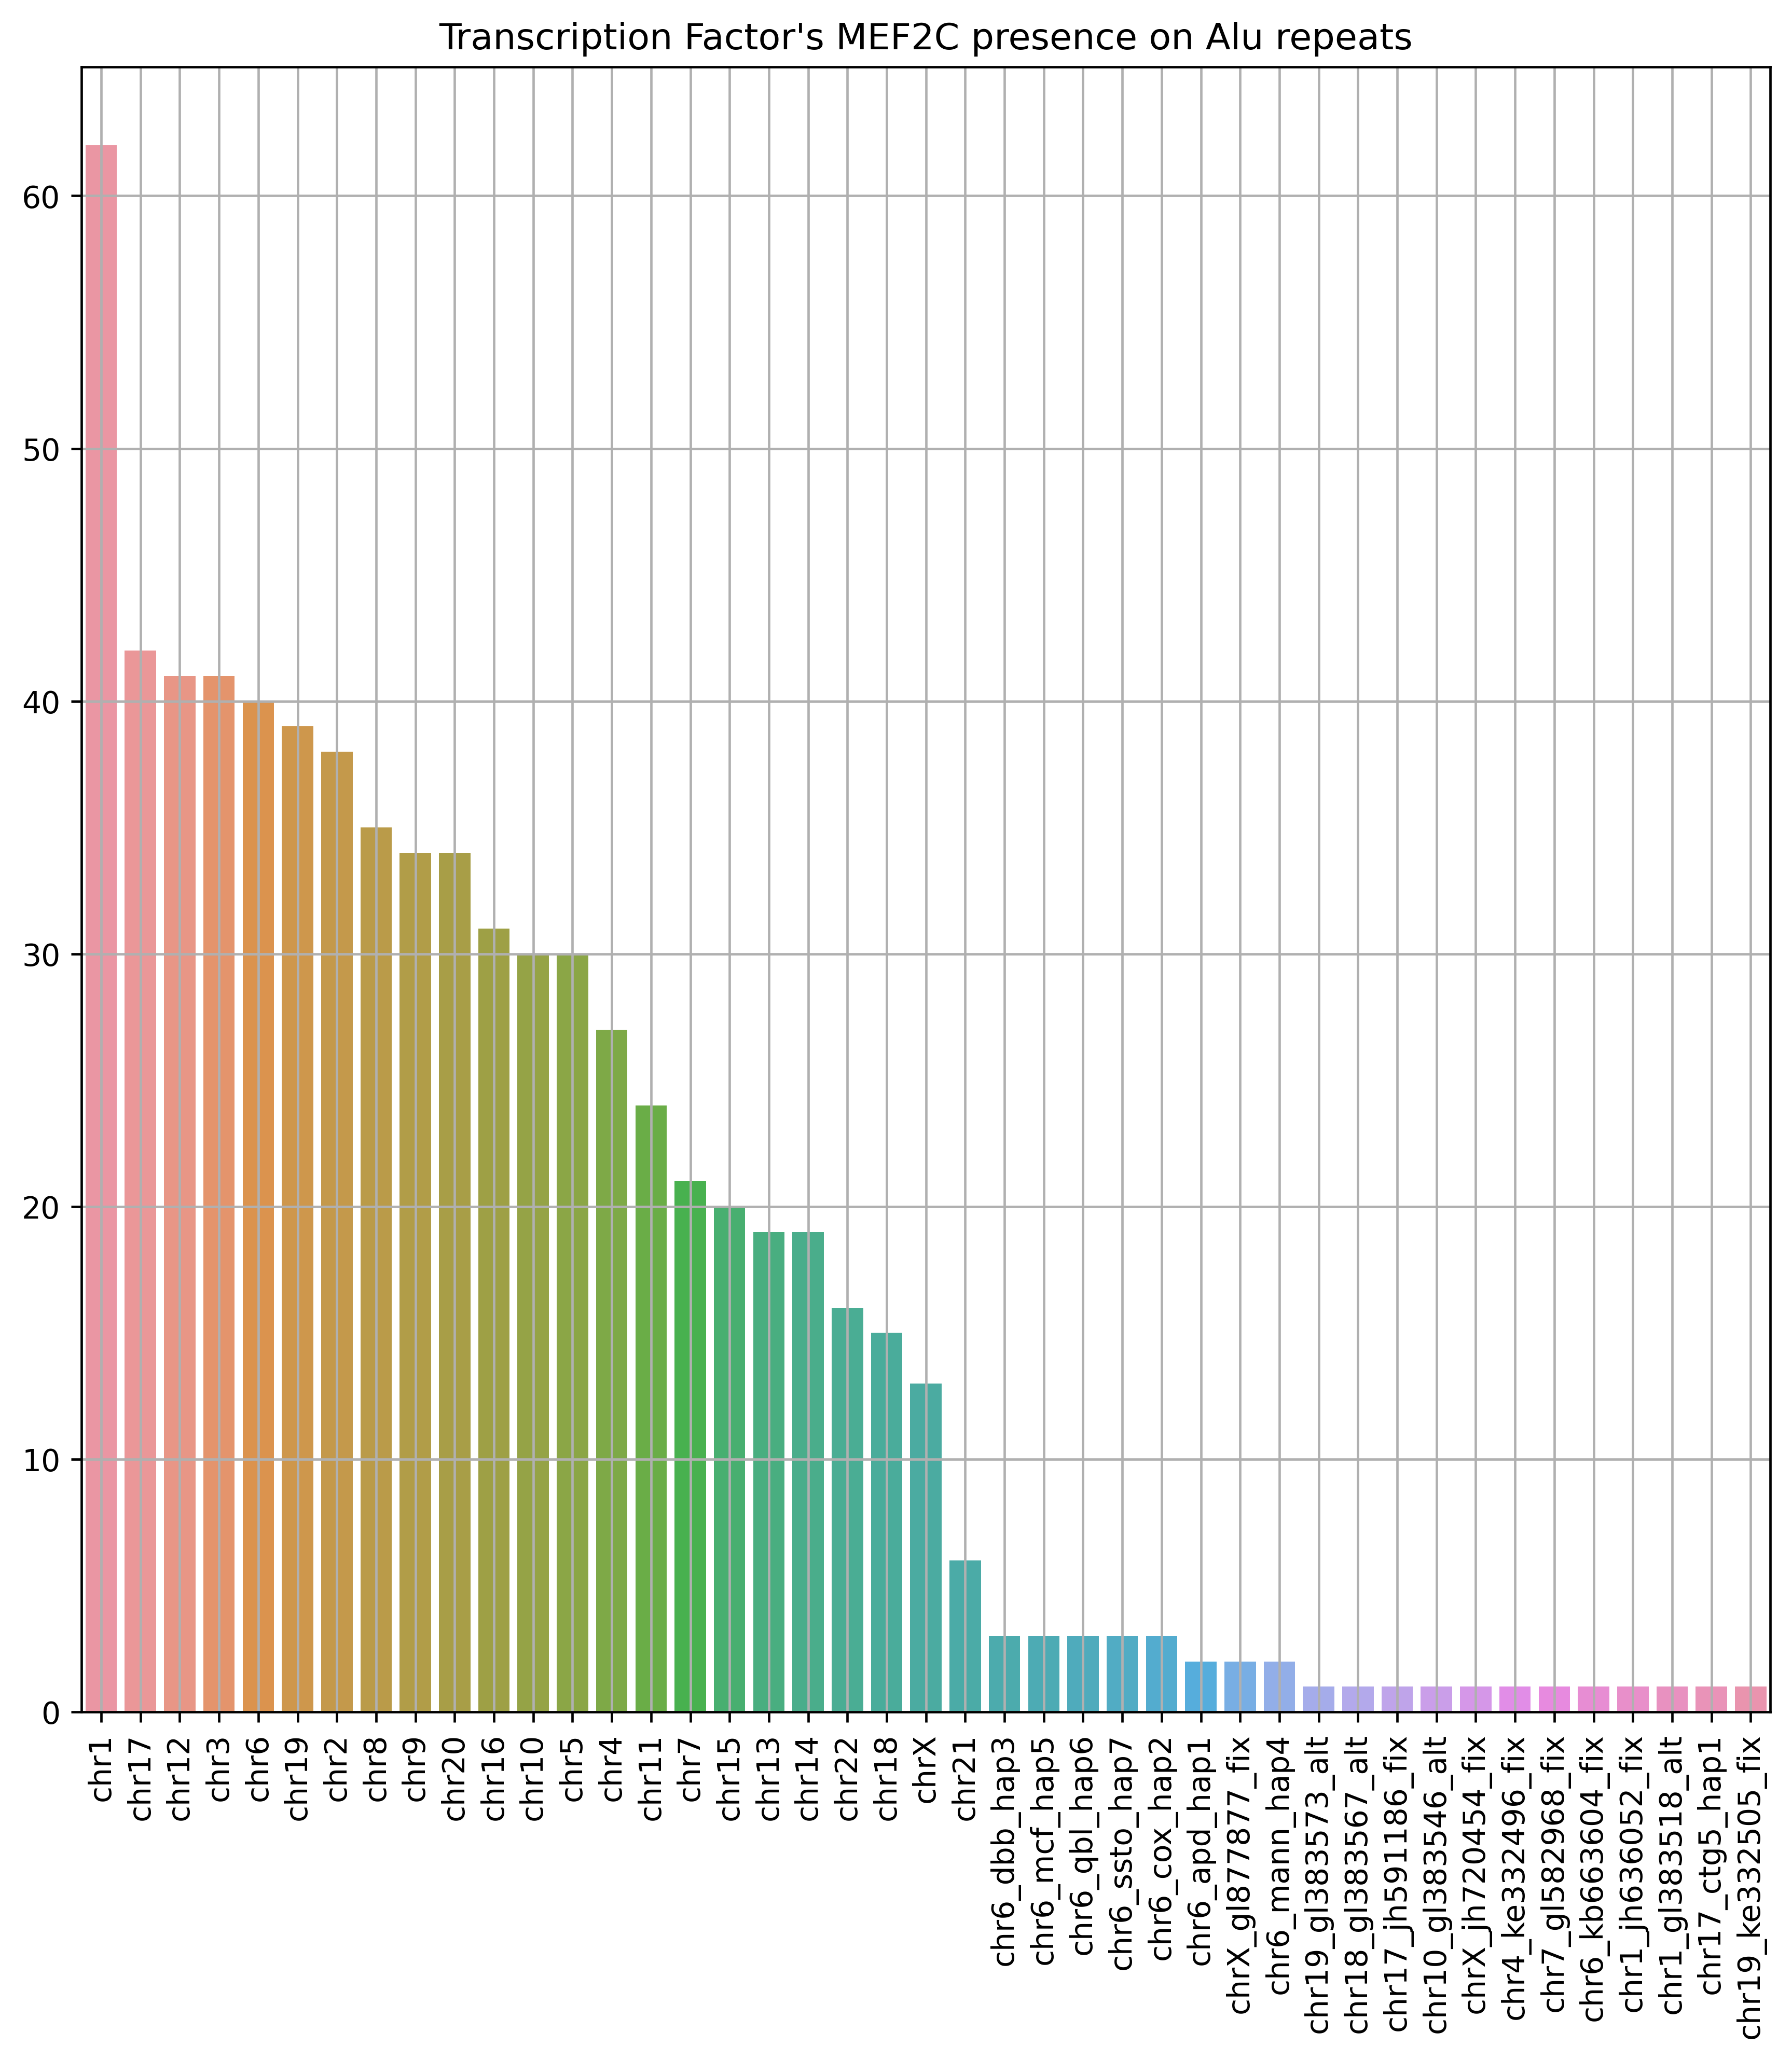

In [33]:
# Plotting value counts of TF's presence on Alu repeats
plt.figure(figsize=(10,10), dpi=420)
sns.barplot(val_counts.index, val_counts.values)
plt.title("Transcription Factor's " + str(user_input_tf) + ' presence on Alu repeats')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

---